Circular Motion

Matthew Saporito

9/18/2022

#   <font color='Green'> **Objective** </font>

##Fully Explain the physics of the following equaiton:
# \begin{align*}
\mathbf{f} &= \frac{mv^2}{R} \,\mathbf{\hat{R}} \quad\quad.
\end{align*}

#   <font color='Green'> **Setup** </font>

In [124]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π = np.pi

def VelocityVerletRot(T, x0=np.array([1.,0.,0.]), v0=np.zeros(3), mass=1., xcenter=np.zeros(3)): 
    Δt = T[1] - T[0]

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))
    f_t = np.zeros((len(T),3))

    x_t[0] = x0
    v_t[0] = v0
    f_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - xcenter )
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt) 

        a_tnew = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - xcenter )
        f_t[t+1] = mass* a_tnew 

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt 
        a_told    = a_tnew

    return x_t, v_t, f_t

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'>  Let's get acquainted with rotational motion. </font>

#### <font color='Red'>  Lets define a time array to indicate all moment of time considered, i.e. as done in previous labs. And define an initial position, velocity, and particle mass. </font>

In [125]:
Δt = 0.0015 ### s(detector)
t0 = 0.
tf = 19*π
timeline = np.arange(t0,tf,Δt)
T = len(timeline)

x0   = np.array([4.,0.,0.])
v0   = np.array([0.00,2.,0.])
mass = 2.5 ## kg

#### <font color='Red'>  Let's begin with Lab 2's Velocity Verlet Method as implemented in $\S$2.4.1 (free fall motion). Feel-free to copy-n-paste your result from there into the code-cell below, and plot your dynamics showing that your code-cell works. </font>

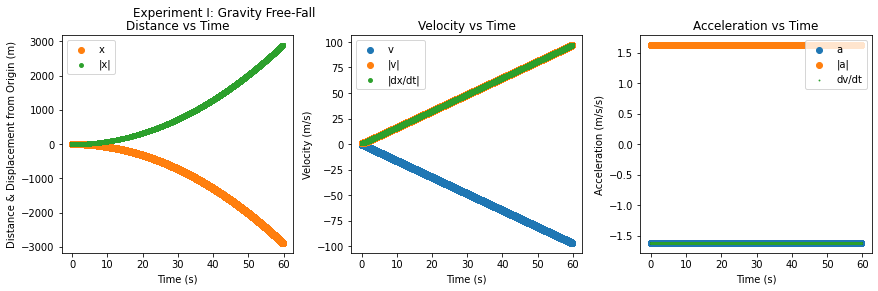

In [126]:
g = -1.62 ## m/s/s
f_t = np.zeros((len(timeline), 3))
f_t[:,0] = m*g

x_t = np.zeros((len(timeline), 3 ))
v_t = np.zeros((len(timeline), 3 ))
a_t = np.zeros((len(timeline), 3 ))

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = f_t[0] / m
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = f_t[t] / m
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment I: Gravity Free-Fall")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.scatter(timeline, (x_t[:,0]), label="x")
ax1.scatter(timeline, np.linalg.norm(x_t, axis=1), s=15, label="|x|")
ax1.set_title("Distance vs Time")
ax1.legend()
ax1.set(xlabel="Time (s)", ylabel="Distance & Displacement from Origin (m)")

ax2.scatter(timeline, (v_t[:,0]), label="v")
ax2.scatter(timeline, np.linalg.norm(v_t   , axis=1), label="|v|")
ax2.scatter(timeline, np.linalg.norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Velocity vs Time")
ax2.legend()
ax2.set(xlabel="Time (s)", ylabel="Velocity (m/s)")

ax3.scatter(timeline, a_t[:,0], label="a")
ax3.scatter(timeline, np.linalg.norm(a_t   , axis=1), label="|a|")
ax3.scatter(timeline, dvdt_t[:,0], s=0.75, label="dv/dt")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration vs Time")
ax3.set(xlabel="Time (s)", ylabel="Acceleration (m/s/s)")
fig.show()

### <font color='Red'>  Next copy-n-paste the earlier VelocityVerlet algorthim but with a modification: </font>
```
a_t[t] = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )
```
### <font color='Red'> use this to our equations-of-motion, and obtain a trajectory and accelerations.</font>

### <font color='Red'> I.e. implement Velocity Verlet with the Centripetal acceleration. </font>

In [127]:
x_t, v_t, f_t = VelocityVerletRot(timeline, x0=x0, v0=v0)

####   <font color='Red'> Plot x(t), y(t), z(t) trajectories (in time) on 1 graph, be sure to include caption. Then Plot v_x(t), v_y(t), v_z(t) velocities (in time) on 1 graph, in conclusion explain this graph </font>

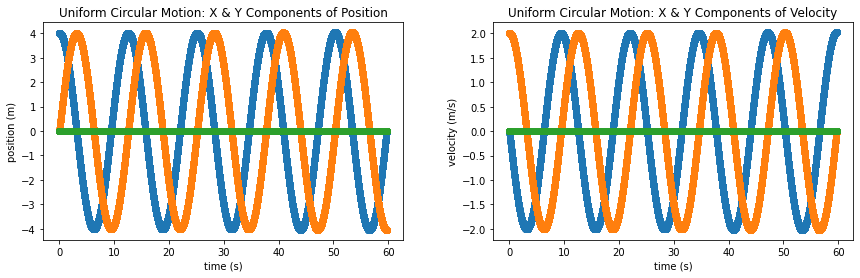

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.scatter(timeline, x_t[:,1])
ax1.scatter(timeline, x_t[:,2])
ax1.set_title("Uniform Circular Motion: X & Y Components of Position")
ax1.set(xlabel="time (s)", ylabel="position (m)")

#ax2.plot(t, field2.getEE(t).real[:,1])
ax2.scatter(timeline, v_t[:,0])
ax2.scatter(timeline, v_t[:,1])
ax2.scatter(timeline, v_t[:,2])
ax2.set_title("Uniform Circular Motion: X & Y Components of Velocity")
ax2.set(xlabel="time (s)", ylabel="velocity (m/s)")

fig.show()

Figs 1 & 2: The two graphs above represent the x and y components of position vs time and velocity vs time of a particle undergoing circular motion. The particle's velocity is the derivative of its position which is shown in the graphs. When the position follows a cosine function, its velocity is shown to follow a negative sine function. That is, d/dx sin(x) = cos(x). Likewise, when the position component follows a sine function, the velocity component follows a cosine function. Since the particle is following a circular path, the graphs that describe its motion are periodic. If the angular velocity, ω, increases the frequency of oscillation of the position vs time and velocity vs time graph also increase. 

###   <font color='Red'> Plot a parametric plot with x and y </font>

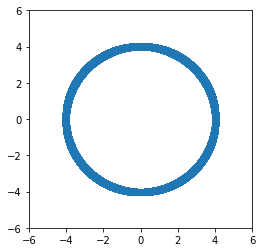

In [129]:
plt.figure(figsize=(4,4)) ## ax.set_aspect('equal','box')
plt.scatter(x_t[:,0], x_t[:,1])
plt.ylim([-6,6])
plt.xlim([-6,6])
plt.show()

Fig 3: The parametric plot above represents the relationship of the x and y components of the particle's position. The position vector of a particle undergoing circular motion is described by its position vector, r→(t). As the particle moves in a circular path, displacement from the x-axis changes by angle θ=ωt. In this case, the position vector at radius r→ can be described by its components along the x and y axes by the equation r→(t)=A*cosωtî + A*sinωtĵ. Since the sine and cosine functions are π/2 radians out phase with eachother, the parametric plot of x and y produces a Lissajous figure that is a perfect circle. 



#   <font color='Red'> **Experiment 2**  </font>

### <font color='Red'>  Let's now implement the  *for-loop over object configurations*; by **varying the velocity**, keeping the objects mass and radius fixed. You may use the VelocityVerletRot method defined above. </font>



#### <font color='Red'> Specify a range of speeds, you'd like to test. And an empty array of what you'd like to measure, i.e. the force (of the same length of the array of speeds). </font>

In [130]:
v_test   = np.arange(0.5, 10.0, 0.1)
f_v_test = np.zeros(len(v_test))

#### <font color='Red'> Setup a time-array like before to test the dynamics.  </font>

In [131]:
Δt = 0.001 ### s(detector)
t0 = 0 
tf = 19*π
timeline = np.arange(t0,tf,Δt)

#### <font color='Red'> Let's run the for-loop, over the velocities we wish to experiment over. </font>

In [132]:
mass = 4.5 ## kg
x0   = np.array([6.24,0.,0.])
for i in range(len(v_test)):
    vv = v_test[i] * np.array([0.00, 1.0, 0.])
    x_t, v_t, f_t = VelocityVerletRot(timeline, x0=x0, v0=vv, mass=mass)

    f_v_test[i]   = np.sum( np.linalg.norm(f_t, axis=1) ) / len(f_t)

#### <font color='Red'> Plot your data: F vs. v </font>

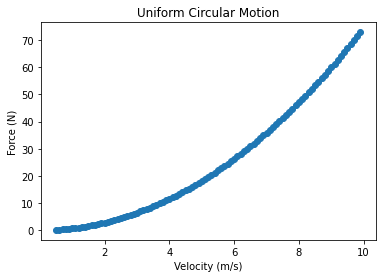

In [133]:
plt.scatter(v_test, f_v_test)
plt.title("Uniform Circular Motion")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Force (N)")
plt.show()

Fig 4: The graph above shows the relationship between centripetal force and velocity of an object moving around a center of rotation. In this case, we are neglecting any air resistance, rotational inertia, or possible friction of the rotating object.  In 1.2.5 of the Lab 4 manual, centripetal force is defined by the equation Fcentripetal=(mv^2)/r, where m is the mass of the object, v is its velocity, and r is the distance away from the center of rotation. In this case, the mass and radius are fixed while v is changed. The slope of the graph increases exponentially since centripetal force is equal to the square of velocity as per the equation described in 1.2.5. The slope = m/R.

#### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = v$^2$). And print the values of m and c with units. </font>

In [134]:
v2   = v_test**2
A    = np.vstack([v2, np.ones(len(v2))]).T
m, c = np.linalg.lstsq(A, f_v_test, rcond=None)[0]

print("slope       = %4.3f kg/m" % m)
print("y-intercept = %4.3f N" % c)

slope       = 0.741 kg/m
y-intercept = -0.203 N


The f_v function above can be linearized by taking its square root. The slope of the graph, m, can then be compared to the theoretical slope. As the time resolution of the simulated detector is increased, the slope of the line further approximates a linear function.  

### <font color='Red'> Get the theoretical slope ratio, e.g. m/R, and print it with units how does it compare with your linear fit? </font>

In [135]:
mtheory = mass / np.linalg.norm(x0)

print("slope-theory= %4.3f kg/m" % mtheory)

slope-theory= 0.721 kg/m


The experimental slope of 0.741 kg/m is very close to the theoretical value of 0.721 kg/m. The percent error = |0.741-0.721|/0.721*100 = 2.77%. 

#### <font color='Red'> Let's plot this linear function (in F vs. v^2): data, simulation-fit, and theory-fit </font>

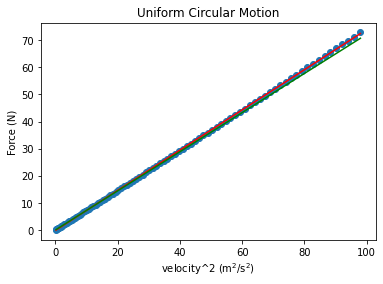

In [136]:
plt.scatter(v_test**2, f_v_test)
plt.plot(v_test**2, m*v_test**2 + c, color="red")
plt.plot(v_test**2, mtheory*v_test**2, color="green" )
plt.title("Uniform Circular Motion")
plt.xlabel("velocity^2 (m$^2$/s$^2$)")
plt.ylabel("Force (N)")
plt.show()

Fig 5: The above graph shows the F vs v^2 linear function of the simulation fit and theory fit of the function. As described above, if we increase the precision of the time increment of the detector, the simulation fit becomes closer to approximating a straight line. 

#   <font color='Red'> **Experiment 3** </font>

### <font color='Red'>  Let's now implement the *for-loop over object configurations*, but this time by **varying the Radius** of rotation, keeping the objects mass and velocity fixed. </font>

In [137]:
R_test   = np.arange(2.5, 7.5, 0.1)
f_R_test = np.zeros(len(R_test))

### <font color='Red'> Define the time array, indicating all moments of time considered </font>

In [138]:
Δt = 0.001 ### s(detector)
t0 = 0 
tf = 19*π
timeline = np.arange(t0,tf,Δt)

### <font color='Red'> For-loop over Radii considered </font>

In [139]:
mass = 5. ## kg
v0   = np.array([0., 1., 0.])
for i in range(len(R_test)):

    RR = np.array([R_test[i], 0.,0.])
    x_t, v_t, f_t = VelocityVerletRot(timeline, x0=RR, v0=v0, mass=mass)

    f_R_test[i]   = np.sum( np.linalg.norm(f_t, axis=1) ) / len(f_t)

### <font color='Red'> Plot the Radii vs. Force graph </font>

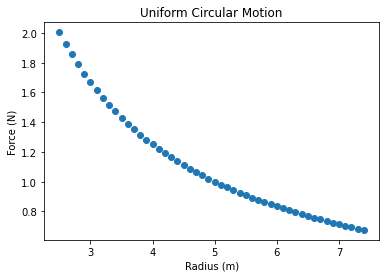

In [140]:
plt.scatter(R_test, f_R_test)
plt.title("Uniform Circular Motion")
plt.xlabel("Radius (m)")
plt.ylabel("Force (N)")
plt.show()


Fig 5: The graph above shows the relationship between centripetal force and radius, or distance of the object away from the center of rotation. Again, we are neglecting any air resistance, rotational inertia, or possible friction of the rotating object. In 1.2.5 of the Lab 4 manual, centripetal force is defined by the equation Fcentripetal=(mv^2)/r, where m is the mass of the object, v is its velocity, and r is the distance away from the center of rotation. In this case, the mass and velocity are fixed while r is changed. The slope of the graph decreases  since centripetal force is equal to inversely proportional to F as per the equation described in 1.2.5. That is, as the radius increasing, the centripetal force decreases.



### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = 1/R). And print the values of m and c with units. </font>

In [141]:
iR   = 1/R_test
A    = np.vstack([iR, np.ones(len(iR))]).T
m, c = np.linalg.lstsq(A, f_R_test, rcond=None)[0]

print("slope       =  %4.3f Nm" % m)
print("y-intercept = %4.3f N" % c)

slope       =  5.015 Nm
y-intercept = -0.002 N


The function ia linearized and the slope of the graph, m, can then be compared to the theoretical slope. As the time resolution of the simulated detector is increased, the slope of the line further approximates a linear function.

### <font color='Red'> Get the theoretical slope ratio, e.g. m v^2, and print it with units how does it compare with your linear fit? </font>

In [142]:
mtheory = mass * np.dot( v0, v0 )

print("theory-slope=  %4.3f Nm" % mtheory)

theory-slope=  5.000 Nm


The experimental slope of 5.015 Nm is very close to the theoretical value of 5.000 Nm. The percent error = |5.015-5.000|/5.000*100 = 0.3%. 

#   <font color='Red'> **Conclusion** </font>

### <font color='Red'> Explain all graphs, and relevant physics invovled in the simulations. Explain the need for a good integration time step $\Delta$t. </font>

The first two graphs above represent the x and y components of position vs time and velocity vs time of a particle undergoing circular motion. The particle's velocity is the derivative of its position which is shown in the graphs. When the position follows a cosine function, its velocity is shown to follow a negative sine function. That is, d/dx sin(x) = cos(x). Likewise, when the position component follows a sine function, the velocity component follows a cosine function. Since the particle is following a circular path, the graphs that describe its motion are periodic. If the angular velocity, ω, increases the frequency of oscillation of the position vs time and velocity vs time graph also increase. 

The parametric plot above represents the relationship of the x and y components of the particle's position. The position vector of a particle undergoing circular motion is described by its position vector, r→(t). As the particle moves in a circular path, displacement from the x-axis changes by angle θ=ωt. In this case, the position vector at radius r→ can be described by its components along the x and y axes by the equation r→(t)=Acosωtî + Asinωtĵ. Since the sine and cosine functions are π/2 radians out phase with each other, the parametric plot of x and y produces a Lissajous figure that is a perfect circle. 

The graph of Force vs Velocity shows the relationship between centripetal force and velocity of an object moving around a center of rotation. In this case, we are neglecting any air resistance, rotational inertia, or possible friction of the rotating object. In 1.2.5 of the Lab 4 manual, centripetal force is defined by the equation Fcentripetal=(mv^2)/r, where m is the mass of the object, v is its velocity, and r is the distance away from the center of rotation. In this case, the mass and radius are fixed while v is changed. The slope of the graph increases exponentially since centripetal force is equal to the square of velocity as per the equation described in 1.2.5. The slope = m/R. 

The graph of Force vs Radius shows the relationship between centripetal force and radius, or distance of the object away from the center of rotation. Again, we are neglecting any air resistance, rotational inertia, or possible friction of the rotating object. In this case, the mass and velocity are fixed while r is changed. The slope of the graph decreases since centripetal force is equal to inversely proportional to F as per the equation described in 1.2.5. That is, as the radius increasing, the centripetal force decreases.

In order to achieve a close to linear relationship, the velocity verlet algorithm must have a high sample rate so that it can adequately integrate the data. If the time intervals between data points are too large or the radius is too small, the integrator is unable to adequately resolve the equations of motion of a particle moving in a circle.

### <font color='Red'> Why is it called Uniform Circular Motion if there is acceleration? </font>

Since velocity is a vector with both magnitude and direction, an object can undergo uniform circular motion at a constant speed but with a changing direction. An object that undergoes UCM is constantly changing direction and therefore has a changing velocity vector which implies that it is accelerating. The direction of this centripetal acceleration is inward while the direction of the velocity is tangent to the circular motion. 

In the case of uniform circular motion, it also important to consider the non-inertial reference frame. From the view of a rotating non inertial reference frame, a centrifugal force seems arise. This centrifugal force can be considered a fictitious force and is not the same as the centripetal force that is directed inward toward the center of rotation. This fictitious force appears to push an object undergoing UCM towards the outside of the circle. For example, the passengers of a car moving to the left continuously around a traffic circle would feel themselves pushed toward the right hand side of the car. The fictitious centrifugal force in this case is an artifact of a non inertial reference frame.

### <font color='Red'> In Circular Motion, where is the Acceleration and Velocity vector pointing at any given time? </font>

In circular motion, the velocity vector points in the direction of motion, tangent to the circle. In order to maintain circular motion, the acceleration vector must point inward toward the center of rotation. This implies that a centripetal force exists that is perpendicular to the velocity vector.

### <font color='Red'> Conclusion </font>

In this lab, an object undergoing uniform circular motion was investigated in silico. First, the equations of circular motion were presented in graphical form. The velocity of the object and radius were manipulated to measure the effect of the relationship between these variables and the centripetal force, described by f=(mv^2)/r. The experimental slopes of these relationships were then compared to theoretical values.